In [243]:
# This prevents the notebook from not updating when external files are changed.
%load_ext autoreload
%autoreload 2

from aux import aux
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data analysis

In [2]:
# Loading the dataset
df = pd.read_csv('./data/Housing.csv', sep=',')
x_train_df = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x_train = x_train_df.to_numpy()
y_train = df['price'].to_numpy()
print(f'x_train shape: {x_train.shape} \t y_train shape: {y_train.shape}')
df.head()

x_train shape: (545, 5) 	 y_train shape: (545,)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
print(f'p2p X {np.ptp(x_train, axis=0)}') # Shows peak to peak of each feature
print(f'p2p Y: {np.ptp(y_train, axis=0)}') 
# for i in range(x_train.shape[1]): 
#     print(f'x{i} p2p: {np.ptp(x_train[:,i])}')
df.describe()

p2p X [14550     5     3     3     3]
p2p Y: 11550000


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


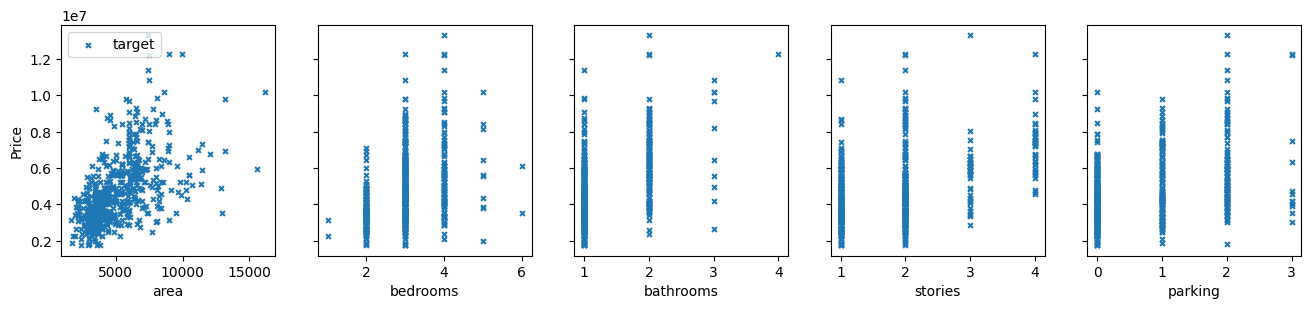

In [224]:
fig, ax = plt.subplots(1,x_train.shape[1], figsize=(16,3), sharey=True)
for i in range(x_train.shape[1]):
    ax[i].scatter(x_train[:,i], y_train, marker = 'x', color = 'tab:blue', s=12)
    ax[i].set_xlabel(x_train_df.columns[i])
ax[0].set_ylabel('Price')
ax[0].legend(['target'], loc='upper left')

### Feature Mapping

### Feature Scalling

Z-score normalization: 

![Alt text](images/zscore.png)

p2p x1: 14550 	 p2p x1 normalized: 6.710792925713349
p2p x2: 5 	 p2p x2 normalized: 6.78070522837378
p2p x3: 3 	 p2p x3 normalized: 5.975995345797447
p2p x4: 3 	 p2p x4 normalized: 3.46142037570236
p2p x5: 3 	 p2p x5 normalized: 3.4851505904474225


Text(0, 0.5, 'price')

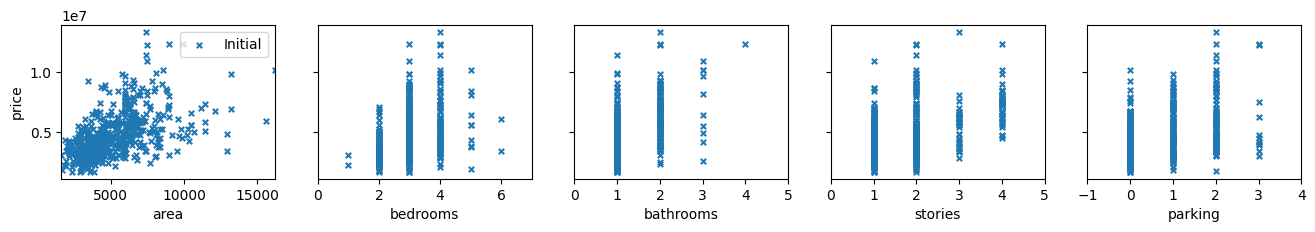

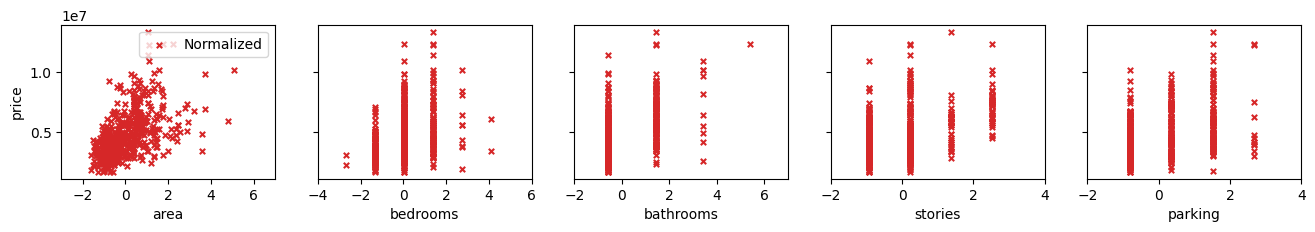

In [247]:
x_train_norm = aux.zscore_normalization(x_train)

for i in range(x_train.shape[1]):
    print(f'p2p x{i + 1}: {np.ptp(x_train[:,i], axis=0)} \t p2p x{i + 1} normalized: {np.ptp(x_train_norm[:,i], axis=0)}')

fig,ax = plt.subplots(1,x_train.shape[1],figsize=(16,2), sharey=True)
for i in range(x_train.shape[1]):
      ax[i].scatter(x_train[:,i], y_train, color='tab:blue', marker = 'x', s=15)
      ax[i].set_xlabel(x_train_df.columns[i])
      ax[i].set_xlim([m.floor(min(x_train[:,i]) - 1), m.ceil(max(x_train[:,i]) + 1)])
      
ax[0].legend(['Initial'])
ax[0].set_ylabel('price')

fig,ax = plt.subplots(1,x_train.shape[1],figsize=(16,2), sharey=True)
for i in range(x_train.shape[1]):
      ax[i].scatter(x_train_norm[:,i], y_train, color='tab:red', marker = 'x', s=15)
      ax[i].set_xlabel(x_train_df.columns[i])
      ax[i].set_xlim([m.floor(min(x_train_norm[:,i]) - 1), m.ceil(max(x_train_norm[:,i]) + 1)])
      
ax[0].legend(['Normalized'])
ax[0].set_ylabel('price')

### Model Training

Model function:

![Alt text](images/linearfunction.png)

Regularized cost function:

![Alt text](images/regularizedlinearcost.png)

Gradient:

![Alt text](images/gradient.png)

Regularized gradient descent:

![Alt text](images/regularizedlineargradientdescent.png)


Found w: [717452.54010024 124521.40498371 568763.61241103 474308.93234641
 325169.96946713] 
Found b: 4766602.636709485
Elapsed time: 0.027


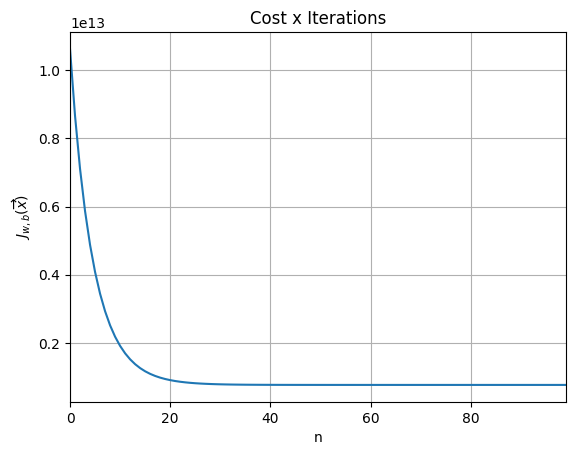

In [245]:
initial_w = np.zeros(x_train.shape[1])
initial_b = 0

time0 = time.time()
w_norm, b_norm, J_history = aux.gradient_descent(
    x_train_norm, 
    y_train, 
    initial_w, 
    initial_b, 
    aux.linear_compute_gradient, 
    aux.linear_compute_cost, 
    n_iters = 100, 
    alpha = 0.1,
    lambda_ = 0.2)

time1 = time.time()
elapsedTime = time1 - time0

plt.plot(J_history, color = 'tab:blue')
plt.title('Cost x Iterations')
plt.xlabel('n')
plt.ylabel('$J_{w,b}(\overrightarrow{x})$')
plt.xlim([0,len(J_history) - 1])
plt.grid()

print(f'\nFound w: {w_norm} \nFound b: {b_norm}')
print(f'Elapsed time: {elapsedTime:.3f}')


### Model Evaluation

Model accuracy (delta <= 1e6): 66.422018
Prediction on training set: [ 7648218.21715298 11348781.50180005  7772588.8020017   7505185.22881085]
Target values: [13300000 12250000 12250000 12215000]


Text(0.5, 0.98, 'Comparisson with sklearn lib')

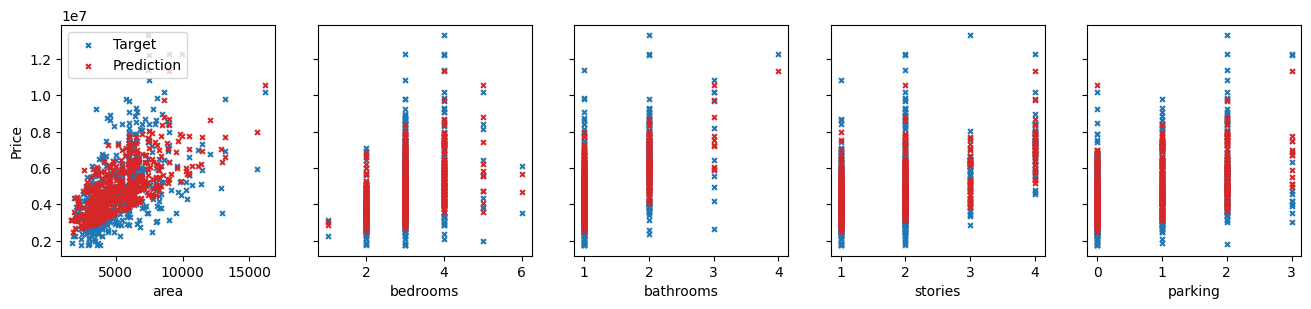

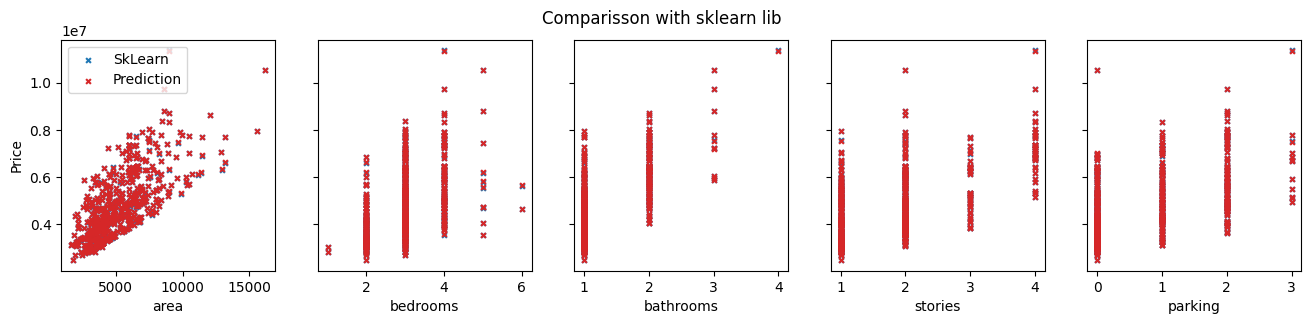

In [260]:
p = aux.linear_prediction(x_train_norm, w_norm, b_norm)
print('Model accuracy (delta <= 1e6): %f'%(np.mean(np.abs(p - y_train) <= 1000000) * 100))
print(f"Prediction on training set: {p[:4]}" )
print(f"Target values: {y_train[:4]}")

w_sk_norm, b_sk_norm, p_sk = aux.sklearn_regression(x_train, y_train)

fig, ax = plt.subplots(1,x_train.shape[1], figsize=(16,3), sharey=True)
for i in range(x_train.shape[1]):
    ax[i].scatter(x_train[:,i], y_train, marker = 'x', color = 'tab:blue', s=12)
    ax[i].scatter(x_train[:,i], p, marker = 'x', color = 'tab:red', s=12)
    ax[i].set_xlabel(x_train_df.columns[i])
ax[0].set_ylabel('Price')
ax[0].legend(['Target', 'Prediction'], loc='upper left')
fig.suptitle("")
fig.suptitle("")

fig, ax = plt.subplots(1,x_train.shape[1], figsize=(16,3), sharey=True)
for i in range(x_train.shape[1]):
    ax[i].scatter(x_train[:,i], p_sk, marker = 'x', color = 'tab:blue', s=12)
    ax[i].scatter(x_train[:,i], p, marker = 'x', color = 'tab:red', s=12)
    ax[i].set_xlabel(x_train_df.columns[i])
ax[0].set_ylabel('Price')
ax[0].legend(['SkLearn', 'Prediction'], loc='upper left')
fig.suptitle("Comparisson with sklearn lib")